# IPSL_10_years_trend_example with xarray and ProPlot

In [84]:
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import proplot as plot

import sys
sys.path.insert(1, '../')
import utils as u
u.check_python_version()
u.check_virtual_memory()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
3.7.4 (default, Aug 13 2019, 20:35:49) 
[GCC 7.3.0]
Virtual memory usage - total: 126 GB / available: 59 GB / percent used: 52.8 %


### Get the IPSL data (all members) from 2005 to 2014 for NH

In [6]:
def get_data():
    n_realization = 31 # 31
    list_da = []
    
    for i in range(1,n_realization+1):
        
        path = '/bdd/CMIP6/CMIP/IPSL/IPSL-CM6A-LR/historical/r'+str(i)+'i1p1f1/LImon/snc/gr/latest/'\
               'snc_LImon_IPSL-CM6A-LR_historical_r'+str(i)+'i1p1f1_gr_185001-201412.nc'
        
        list_da.append(xr.open_dataset(path).snc.sel(time=slice('2005','2014'), lat=slice(20, 90)))

    snc = xr.concat(
        list_da, 
        pd.Index(['r'+str(i)+'i1p1f1' for i in range(1,n_realization+1)], name='realization')
    )
    
    return snc

In [10]:
snc = get_data()
u.check_virtual_memory()
snc

Virtual memory usage - total: 126 GB / available: 60 GB / percent used: 52.3 %


<xarray.DataArray 'snc' (realization: 31, time: 120, lat: 56, lon: 144)>
array([[[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         [ 0.,  0.,  0., ...,  0.,  0.,  0.],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]],

        ...,

        [[ 0.,  0.,  0., ...,  0.,  0

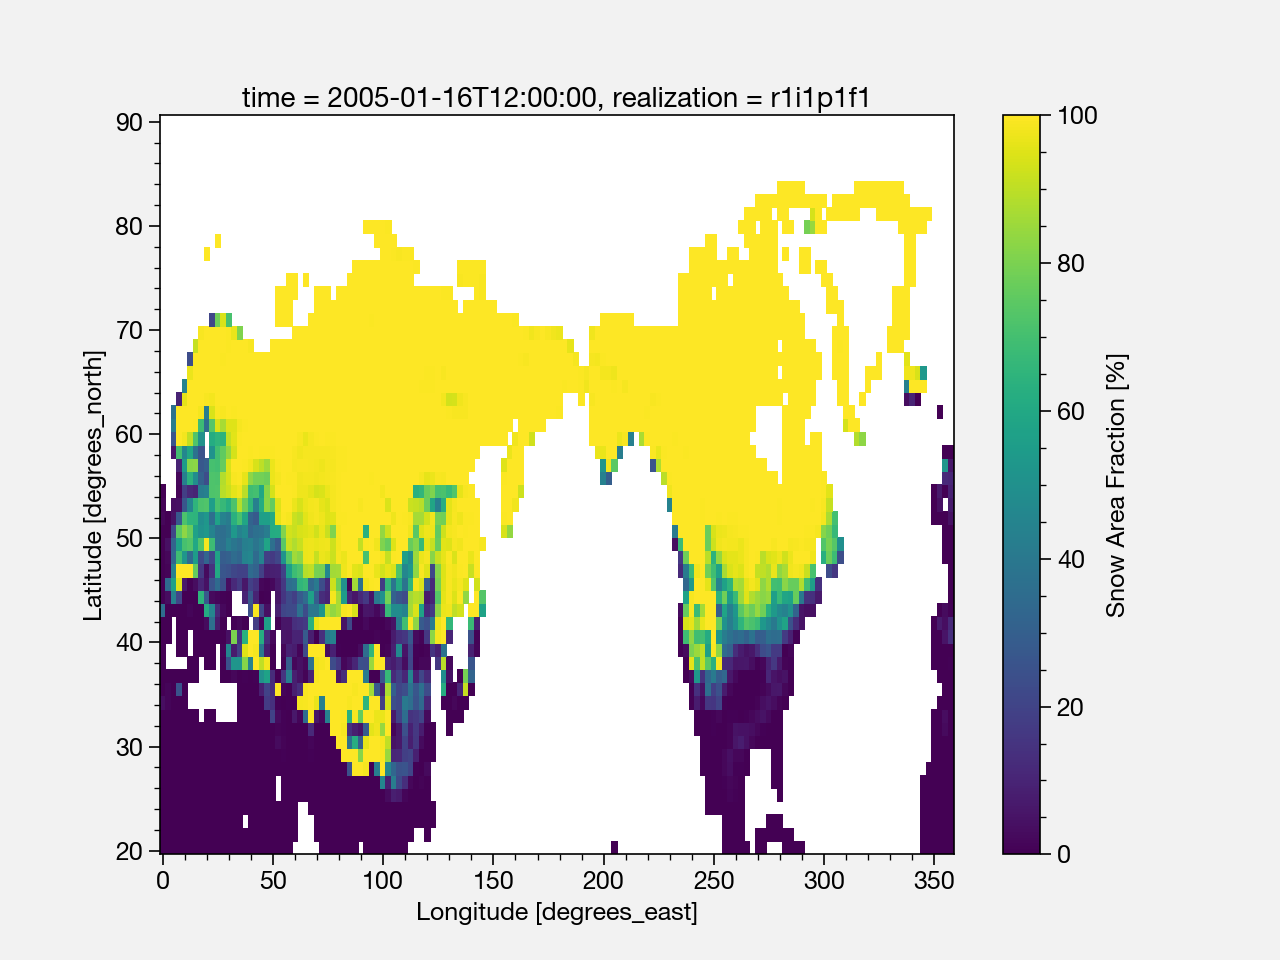

In [14]:
snc[0,0].plot()

### Compute the MAM climatology

In [49]:
MAM_ens_cmip6 = u.custom_season_clim(snc, calendar=snc.time.encoding['calendar'], season='MAM')
MAM_ens_cmip6

<xarray.DataArray (realization: 31, lat: 56, lon: 144)>
array([[[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0

### Compute the ensemble mean

In [50]:
ens_avg_snow = MAM_ens_cmip6.mean('realization', skipna=False, keep_attrs=True)
ens_avg_snow

<xarray.DataArray (lat: 56, lon: 144)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

## Plot

In [85]:
# Add cyclic point
ens_avg_snow_cyclic = u.cyclic_dataarray(ens_avg_snow)
ens_avg_snow_cyclic

<xarray.DataArray (lat: 56, lon: 145)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 352.5 355.0 357.5 360.0
  * lat      (lat) float32 20.28169 21.549295 22.816902 ... 88.73239 90.0
    season   <U3 'MAM'
Attributes:
    long_name:           Snow Area Fraction
    units:               %
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_snow_area_fraction
    description:         Fraction of each grid cell that is occupied by snow ...
    history:             none
    cell_measures:       area: areacella

In [128]:
# ens_avg_snow_cyclic.to_netcdf('proplot_issues/ens_avg_snow_cyclic.nc')
# ens_avg_snow.to_netcdf('proplot_issues/ens_avg_snow.nc')

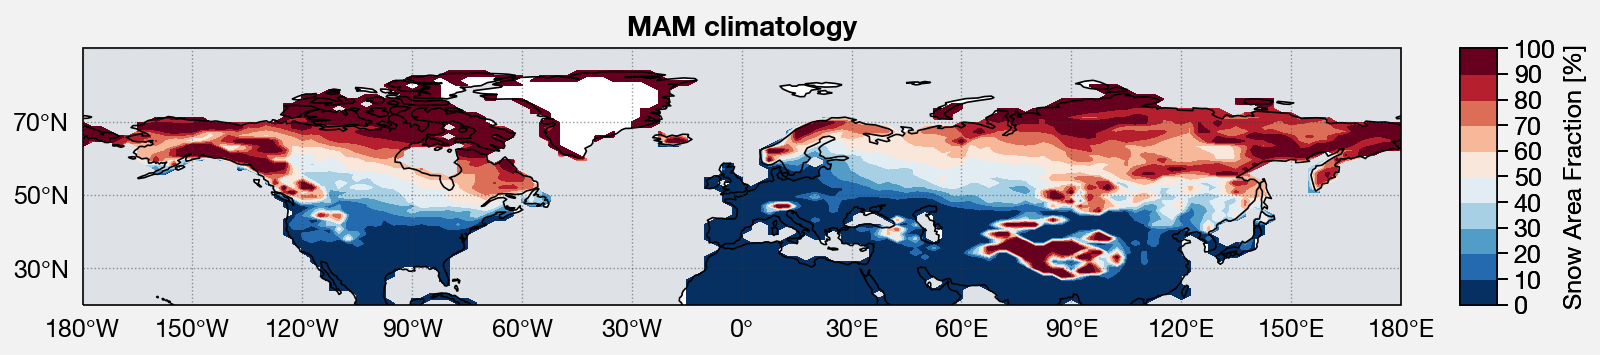

In [127]:
f, axs = plot.subplots(proj='cyl', width=8)

m = axs[0].contourf(ens_avg_snow_cyclic, cmap='BuRd')

f.colorbar(m, label=ens_avg_snow_cyclic.long_name + ' ['+ens_avg_snow_cyclic.units+']')

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', latlim=(20,90),
    suptitle=str(ens_avg_snow.season.values) + ' climatology', title=''
)

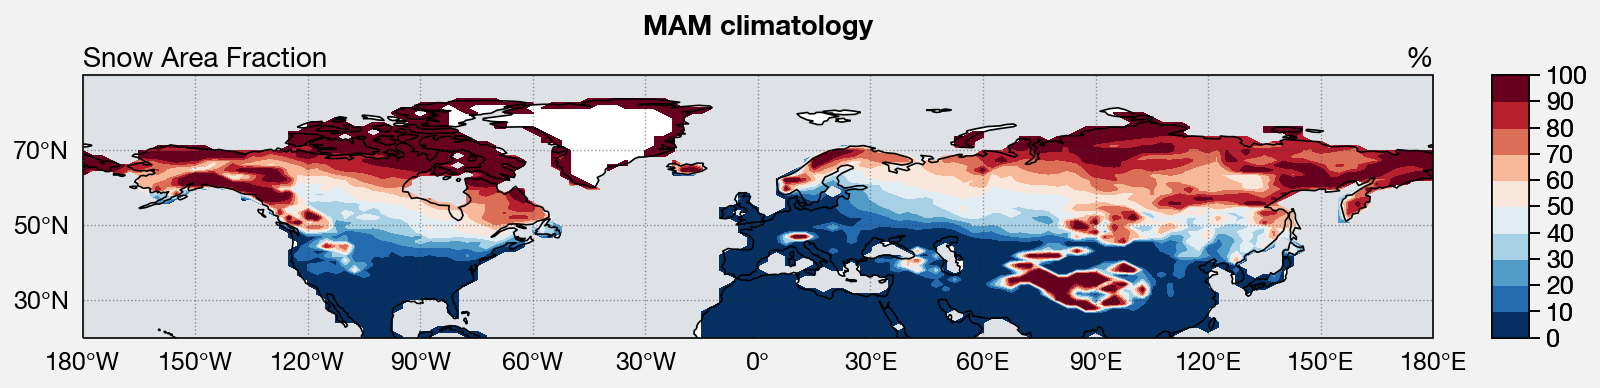

In [125]:
f, axs = plot.subplots(proj='cyl', width=8)

m = axs[0].contourf(ens_avg_snow_cyclic, cmap='BuRd')

f.colorbar(m)

axs.format(
    geogridlinewidth=0.5, geogridcolor='gray8', geogridalpha=0.5, labels=True, 
    coast=True, ocean=True, oceancolor='gray3', latlim=(20,90),
    suptitle=str(ens_avg_snow.season.values) + ' climatology',
    ltitle=ens_avg_snow_cyclic.long_name, rtitle=ens_avg_snow_cyclic.units, title=''
)